<a href="https://colab.research.google.com/github/Mohbad88/tp_middleware/blob/main/Music_tracks_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Beyoncé_MusicTracks_data analysis**

L'objectif de ce projet est de fournir une vue d'ensemble des sorties musicales de Beyoncé sur Spotify, spécialement conçue pour mettre en valeur sa production créative. A cette fin, le dataset comprend des titres provenant des types d'albums suivants :
Albums : Les albums complets publiés par Beyoncé, englobant un éventail de ses styles musicaux et de ses époques.

Singles : Les sorties de singles autonomes, mettant en évidence les chansons clés qui ont été publiées indépendamment des albums complets de Beyoncé.

Il est important de noter que le datset exclut délibérément les albums de compilation. Les compilations, qui contiennent souvent un mélange de titres de différents artistes ou de titres déjà publiés par Beyoncé, ne sont pas incluses afin de maintenir l'accent sur ses sorties originales et de fournir une image plus claire de son évolution artistique.



***Importation des bibliothèques nécessaires***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Chargement du dataset
beyonce_df = pd.read_csv('beyonce_tracks.csv')

#Inspection du dataset
beyonce_df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


# **Exploration et Nettoyage de mes données**

In [3]:
# Pour voir la forme du dataset
beyonce_df.shape

(336, 20)

In [4]:
# j'effectue une copie de mon dataset
df = beyonce_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       336 non-null    object 
 1   track_name        336 non-null    object 
 2   album_name        336 non-null    object 
 3   is_explicit       336 non-null    bool   
 4   genres            336 non-null    object 
 5   release_date      336 non-null    object 
 6   track_id          336 non-null    object 
 7   danceability      336 non-null    float64
 8   valence           336 non-null    float64
 9   energy            336 non-null    float64
 10  loudness          336 non-null    float64
 11  acousticness      336 non-null    float64
 12  instrumentalness  336 non-null    float64
 13  liveness          336 non-null    float64
 14  speechiness       336 non-null    float64
 15  key               336 non-null    int64  
 16  tempo             336 non-null    float64
 1

D'après mes permiers info , le type de 'release_date' est un objet donc je suis obligé de le mettre en type datetime

In [5]:
#convertir la colone release_date en type date
from datetime import datetime
df['release_date'] = pd.to_datetime(df.release_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_name       336 non-null    object        
 1   track_name        336 non-null    object        
 2   album_name        336 non-null    object        
 3   is_explicit       336 non-null    bool          
 4   genres            336 non-null    object        
 5   release_date      336 non-null    datetime64[ns]
 6   track_id          336 non-null    object        
 7   danceability      336 non-null    float64       
 8   valence           336 non-null    float64       
 9   energy            336 non-null    float64       
 10  loudness          336 non-null    float64       
 11  acousticness      336 non-null    float64       
 12  instrumentalness  336 non-null    float64       
 13  liveness          336 non-null    float64       
 14  speechiness       336 non-

In [6]:
# je verifie les valeurs nulles dans mon dataset
nv = df.isnull().sum()
nv

artist_name         0
track_name          0
album_name          0
is_explicit         0
genres              0
release_date        0
track_id            0
danceability        0
valence             0
energy              0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
key                 0
tempo               0
mode                0
duration_ms         0
time_signature      0
dtype: int64

**Pas de valeurs nulles donc nous sommes bon **

In [7]:
# je verifie les valeurs dupliques dans mon datset
df.duplicated().sum()

0

**Pas de valeurs dupliqués donc nous sommes bon**

# **Exploration de donnée et Visualisation**

In [8]:
df.columns

Index(['artist_name', 'track_name', 'album_name', 'is_explicit', 'genres',
       'release_date', 'track_id', 'danceability', 'valence', 'energy',
       'loudness', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness', 'key', 'tempo', 'mode', 'duration_ms', 'time_signature'],
      dtype='object')

In [9]:
# Résumé statistique de mon dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
release_date,336,2012-01-18 10:47:08.571428608,2002-06-17 00:00:00,2007-05-29 00:00:00,2009-07-21 00:00:00,2019-04-17 00:00:00,2024-02-10 00:00:00,NaN
danceability,336.0,0.61264,0.143,0.50875,0.635,0.72525,0.925,0.155603
valence,336.0,0.490362,0.0388,0.323,0.4895,0.651,0.971,0.233648
energy,336.0,0.682492,0.0452,0.55775,0.715,0.82175,0.993,0.18909
loudness,336.0,-7.28972,-27.432,-8.451,-6.7505,-5.44675,-2.706,2.854806
acousticness,336.0,0.138767,0.000066,0.005295,0.0372,0.158,0.994,0.219504
instrumentalness,336.0,0.079687,0.0,0.0,0.00002,0.00551,0.937,0.209146
liveness,336.0,0.305424,0.0162,0.0972,0.201,0.39275,0.983,0.265685
speechiness,336.0,0.168143,0.0271,0.05365,0.1065,0.25475,0.94,0.150844
key,336.0,5.181548,0.0,1.0,6.0,8.0,11.0,3.568488


# ***On cherche à trouver le genre de music associé a Béyonce***

In [ ]:
df.genres.unique()

array(['pop, r&b'], dtype=object)

*Beyonce est associé à des musiques du genre Pop et R&B*

# **On cherche ici la distribution de la variable denceability pour comprendre le score de la danceability**

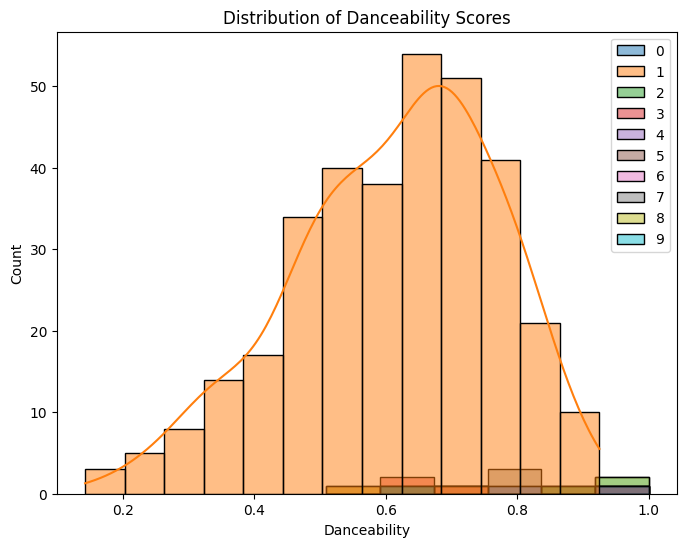

In [ ]:
# je crée une visualisation de la variable danceability
plt.figure(figsize=(8,6))
current_palette = sns.color_palette()
sns.histplot(sns.color_palette("pastel", 10))
sns.histplot(df['danceability'], kde=True)
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.title("Distribution of Danceability Scores")
plt.show()

In [ ]:
# vérification de l'asymétrie
df.danceability.skew()

-0.4613910804180383

*La valeur de l'asymétrie de -0.4613910804180383 indique que la distribution des notes de facilité de danse pour les morceaux de Beyonce est légèrement asymétrique.
On peut considérer qu'il s'agit d'une asymétrie négative modérée et non d'une asymétrie extrême.
L'asymétrie négative suggère qu'il y a plus de titres avec des scores de facilité de danse inférieurs que de titres avec des scores de facilité de danse supérieurs.
Cela signifie que les morceaux de Beyonce penchent davantage vers des scores de facilité de danse plus faibles.*

**Ici, je cherche Comment l'énergie des titres de Beyonce varie-t-elle d'un album à l'autre dans le top 10 ?**

In [10]:
df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


In [12]:
# j'effectue un regroupement des noms des albums avec la var energy
energy_by_album = df.groupby('album_name')['energy'].mean().reset_index()
energy_by_album = energy_by_album.sort_values(by='energy', ascending=False)
energy_by_album.head()

,album_name,energy
20,Green Light Freemasons EP,0.934250
10,Beautiful Liar (Freemasons Remix Edit),0.908000
8,BREAK MY SOUL REMIXES,0.890250
30,Irreplaceable (remixes),0.868143
12,Check On It (Remix 5 Pak) (feat. Bun B & Slim ...,0.857400


In [13]:
energy_by_album.tail()

,album_name,energy
0,16 CARRIAGES,0.453000
4,At Last,0.438000
16,Dangerously In Love,0.430229
47,The Star Spangled Banner - Super Bowl XXXVIII ...,0.326000
19,Fever,0.261000


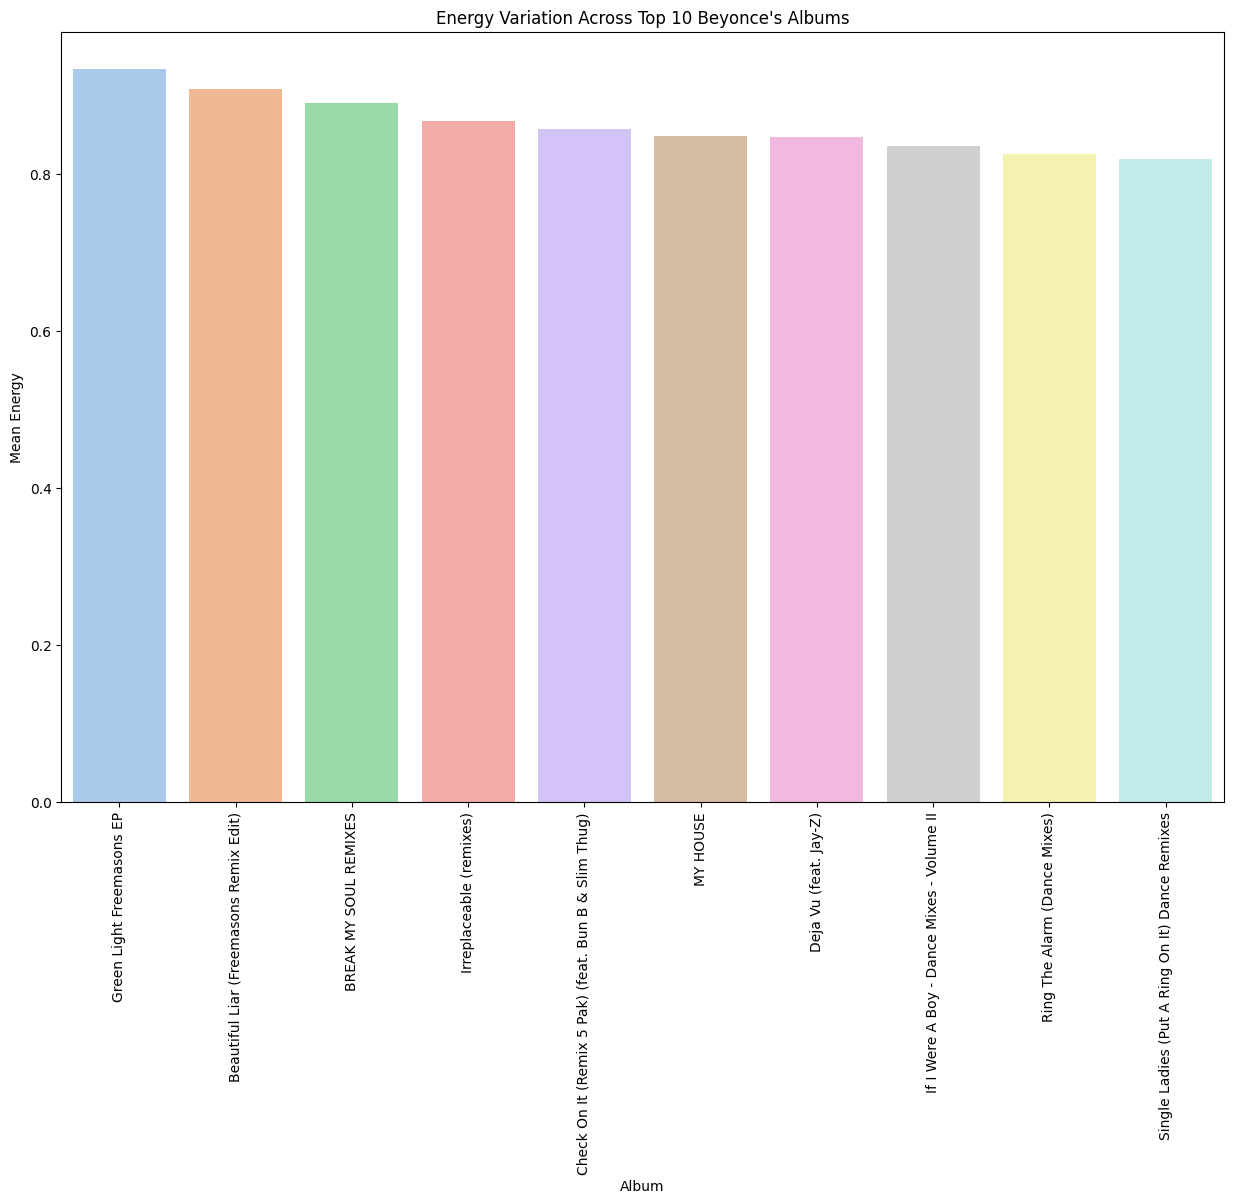

In [18]:
top_10 = energy_by_album.head(10)

# Graphique de la moyenne des energy avec les albums
plt.figure(figsize=(15, 10))
sns.barplot(x='album_name', y='energy', data= top_10, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Album')
plt.ylabel('Mean Energy')
plt.title("Energy Variation Across Top 10 Beyonce's Albums")
plt.show()

**Observation**  

L'album 'Green Light Freemasons EP' possède l'energy moyenne comaparativement aux autres albums

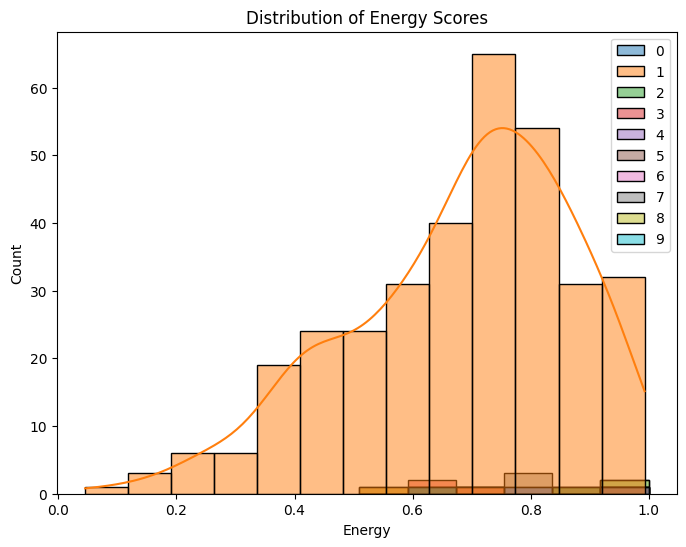

In [19]:
# j'affiche cette histigramme pour comprendre la distribution de l'energie
plt.figure(figsize=(8,6))
current_palette = sns.color_palette()
sns.histplot(sns.color_palette("pastel", 10))
sns.histplot(df['energy'], kde=True)
plt.xlabel('Energy')
plt.ylabel('Count')
plt.title("Distribution of Energy Scores")
plt.show()

In [20]:
df.energy.skew()

-0.6564896281869635

***observation***: La valeur de l'asymétrie de -0,6564896281869635 indique que la distribution de l'énergie pour les morceaux de Beyonce est légèrement asymétrique.

On peut considérer qu'il s'agit d'une asymétrie négative modérée et non d'une asymétrie extrême.
L'asymétrie négative suggère qu'il y a plus de titres avec des scores d'énergie plus faibles.
Cela signifie que les titres de Beyonce penchent davantage vers des scores d'énergie plus faibles.


**Ici , je cherche à comprendre la relation entre la variable 'valence et la variable 'energie' ?**

In [21]:
# j'effectue un regroupement avec la variable 'valance' avec l'energy
val_by_energy = df.groupby('valence')['energy'].sum().reset_index()
val_by_energy = val_by_energy.sort_values(by='energy', ascending=False)
val_by_energy.head()

,valence,energy
34,0.184,3.588
48,0.217,2.470
77,0.353,2.136
177,0.598,1.965
157,0.551,1.895


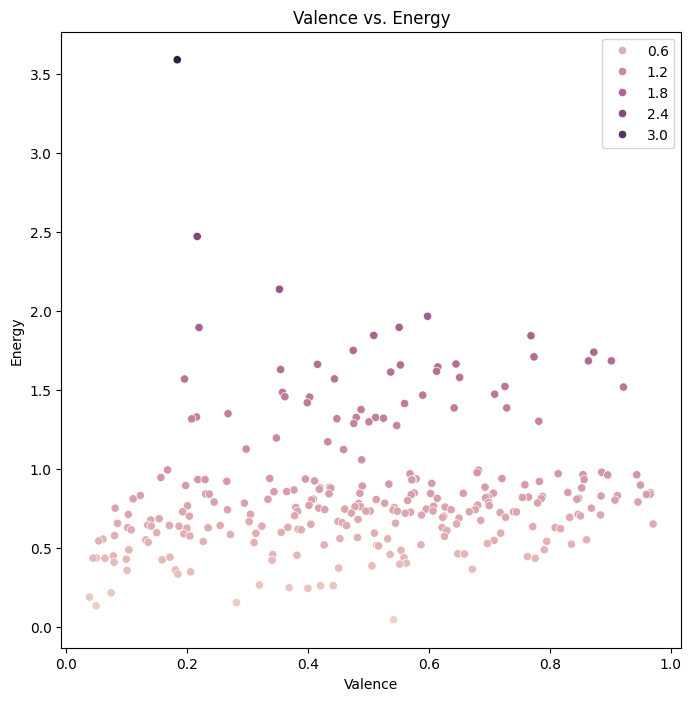

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='valence', y='energy', hue = 'energy', data= val_by_energy)
plt.title('Valence vs. Energy')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend()
plt.show()

Le score de valence mesure la positivité musicale d'un morceau, allant de 0,0 (triste, négatif) à 1,0 (joyeux, positif). Le score d'énergie, qui est une mesure de l'intensité et de l'activité d'un morceau, allant de 0,0 (peu d'énergie) à 1,0 (beaucoup d'énergie).

Observation :

La plupart des morceaux sont concentrés dans le quadrant inférieur gauche, ce qui indique que la plupart des chansons ont une faible valence, c'est-à-dire que ces chansons sont tristes et ont également un faible score d'énergie.

Quelques titres ont des scores d'énergie élevés (supérieurs à 0,8), mais leurs scores de valence sont répartis sur une plus grande échelle, de faible à élevée.

Il existe quelques valeurs aberrantes avec des scores de valence très élevés (supérieurs à 0,8) et des scores d'énergie modérés à élevés.

La distribution globale des points suggère une corrélation positive entre l'énergie et la valence, ce qui signifie que les pistes ayant une énergie plus élevée ont tendance à avoir des scores de valence plus élevés (plus positifs ou plus heureux), et vice versa. Toutefois, la corrélation n'est pas extrêmement forte, car de nombreux points s'écartent encore d'une relation linéaire parfaite.

**Ici, on cherche à comprendre Comment l'énergie des morceaux de Beyonce a-t-elle évolué au fil du temps ?**

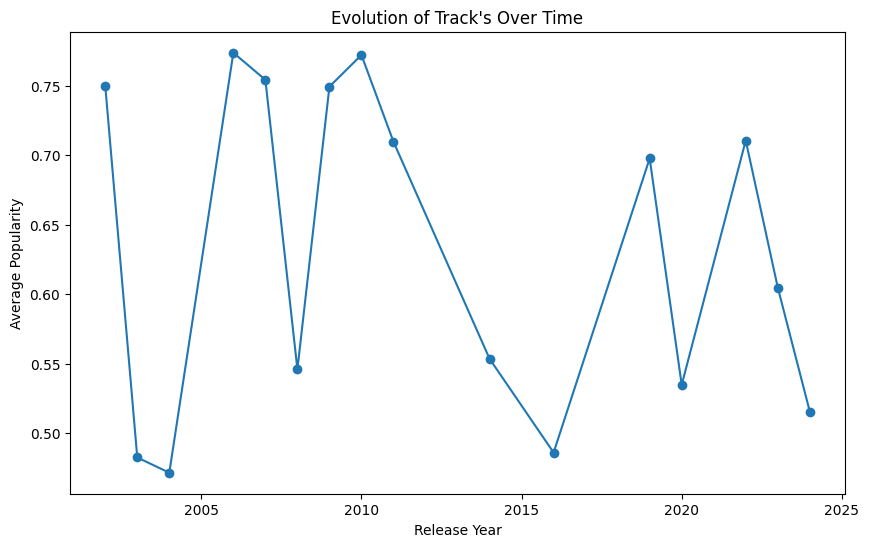

In [23]:
plt.figure(figsize=(10, 6))
df.groupby(df['release_date'].dt.year)['energy'].mean().plot(kind='line', marker='o')
plt.title("Evolution of Track's Over Time")
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

**Enfin, j'établis la corrélation entre les caractéristiques numériques telles que la dansabilité, la valence, l'énergie, l'intensité sonore, l'acoustique, l'instrumentalité, la vivacité, l'élocution, le tempo et la durée.**

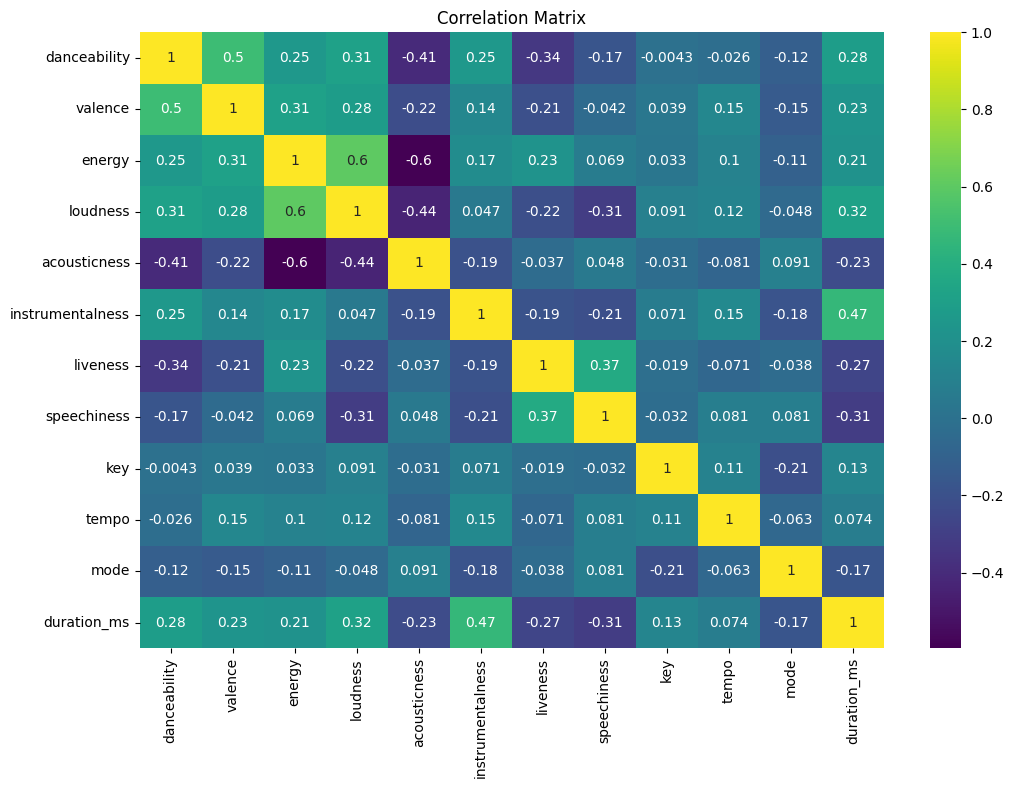

In [24]:
# Calculate the pearson correlation matrix
corr_matrix = df[['danceability', 'valence', 'energy',
       'loudness', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness', 'key', 'tempo', 'mode', 'duration_ms']].corr()

# plot the correlation matrix as a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()